In [27]:
import numpy as np
import matplotlib.pyplot as plt

5.1.21

Задание векторов

In [70]:
x = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
y = np.array([-2.815, -2.18, -0.225, 1.722, 3.492, 3.31, 2.945, 1.449, 0.334, -1.906, -3.430, -2.983, 0.087])

Создание системы

In [73]:
def mnk(X, Y, m):
    A = np.array([[x**j for j in range(m+1)] for x in X])
    return np.linalg.solve(A.T@A, A.T@Y)

def polynom(x, koefs):
    res = 0
    for pow, w in enumerate(koefs):
        res += w * x**pow
    return res

Построение гистограммы

<BarContainer object of 10 artists>

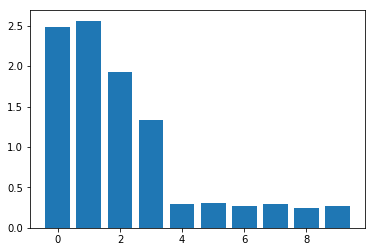

In [74]:
sigma = []
for m in range(10):
    koefs = mnk(x, y, m)
    y1 = np.array([polynom(x[i], koefs) for i in range(x.shape[0])])
    sigma.append(np.sqrt(np.sum((y1 - y)**2) / (y.shape[0] - koefs.shape[0])))

plt.bar(range(10), sigma)

m = 4

Построение графиков

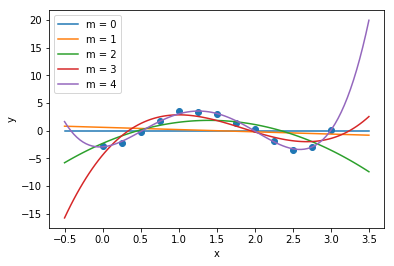

In [75]:
m1 = 4
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
x1 = np.linspace(-0.5, 3.5, 100)
for m in range(m1 + 1):
    koefs = mnk(x, y, m)
    y1 = np.array([polynom(x, koefs) for x in x1])
    plt.plot(x1, y1, label = 'm = ' + str(m))
plt.legend()

5.2.4

In [76]:
t = np.arange(0, 6.6, 0.6)
x = np.array([6.449, 19.97, 33.91, 48.2, 64.15, 76.9, 106.2, 122.2, 135.6, 149])
t = np.delete(t, 6)

Используем МНК

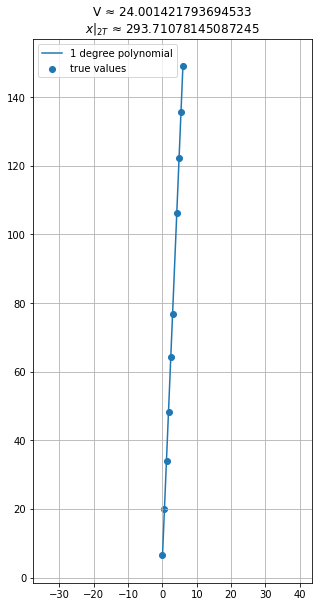

In [91]:
plt.figure(figsize = (5,10))
plt.scatter(t, x, label = 'true values')

m = 1
w = mnk(t, x, m)
x_grid = np.linspace(t[0], t[-1], 2)
y_grid = polynom(x_grid, w)
plt.plot(x_grid, y_grid, label = str(m) + ' degree polynomial')
    
plt.title('V ≈ ' + str(w[1]) + '\n$x|_{2T}$ ≈ ' + str(polynomial(2 * t[-1], w)))
plt.legend()
plt.axis('equal')
plt.grid()

5.5.11 (5.5.3)

Начальные параметры

In [97]:
y = np.array([-1.3111, -2.8426, -2.4981, -0.2912, 2.3164, 3.5128, 2.3528, -0.2767, -2.5041, -2.8408, -1.3088, 0.7309, 1.6866, 1.0946, -0.2552, -0.8962, -0.2370, 1.0992, 1.6841, 0.7336, -1.2845])
x = -1 + 0.1 * np.arange(21)
a = 3
b = 2

Нахождение коэффицентов

In [106]:
x_1 = np.sin(a*np.pi*x)
x_2 = np.cos(b*np.pi*x)
A = np.hstack([x_1.reshape(-1, 1), x_2.reshape(-1, 1)])
c1, c2 = np.linalg.lstsq(A, y, rcond=None)[0]
c1, c2

(2.2042080713928054, -1.3018197945954162)

5.8.2